In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import glob
from matplotlib.colors import LogNorm
import pathlib
import pickle

In [47]:
# Inputs ETH
run_type = 'brca'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    samples = ['TCGA-C8-A12P-01A-11R-A115-07',
                      'TCGA-AO-A0JM-01A-21R-A056-07',
                      'TCGA-BH-A18V-01A-11R-A12D-07',
                      'TCGA-A2-A0D2-01A-21R-A034-07',
                      'TCGA-A2-A0SX-01A-12R-A084-07']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    samples = ['TCGA-25-1319-01A-01R-1565-13',
                      'TCGA-25-1313-01A-01R-1565-13',
                      'TCGA-61-2008-01A-02R-1568-13',
                      'TCGA-24-1431-01A-01R-1566-13',
                      'TCGA-24-2298-01A-01R-1569-13']
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'

filtering_id = 'filters_19May_order_5ge_wAnnot_STAR'
filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)


# PLOT
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = sample_target
pathlib.Path(plot_dir).mkdir(parents=True, exist_ok=True)

# OHSU
tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_June2023_filter-debug_all_output.tar.gz'

In [48]:
# ETH Names
eth_all = glob.glob(os.path.join(filter_dir, 'G*'))

In [49]:
# eth_all = [i.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') for i in eth_all ]


In [50]:
# OHSU Names
with tarfile.open(tar_file_OHSU, "r:*") as tar:
    ohsu_all = tar.getnames()

In [51]:
# ohsu_all = [i.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') for i in ohsu_all ]
# ohsu_all = [i.replace('CohortLimNone', 'CohortLimAny') for i in ohsu_all ]
# ohsu_all = [i.replace('CohortLim0.0', 'CohortLimAny') for i in ohsu_all ]



In [52]:
# Get file pairs
file_pair = {}
for idx_eth, eth in enumerate(eth_all):
    eth_pattern = os.path.basename(eth).replace('G_', '').replace('.gz', '') 
    for idx_ohsu, ohsu in enumerate(ohsu_all):
        ohsu_adapt = ohsu.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny').replace('CohortLimNone', 'CohortLimAny').replace('CohortLim0.0', 'CohortLimAny')  
        eth_pattern = eth_pattern.replace('FiltNormalsGtexCohortCohortlim0.0', 'FiltNormalsGtexCohortCohortlimAny') 
        if eth_pattern in ohsu_adapt:
            file_pair[eth] = ohsu

            

In [53]:
# all_ohsu = set([ j for j in ohsu_all if ('SampleLim'in j) and ('GtexCohortCohort') in j])

In [54]:
# found_ohsu = set(file_pair.values())
# found_eth = set(file_pair.keys()) 

In [55]:
# all_eth = set(eth_all)

In [56]:
# len(all_eth)

In [57]:
# len(all_eth - found_eth)

In [58]:
# all_eth - found_eth

In [59]:
#len(all_ohsu.difference(found_ohsu))

In [60]:
#all_ohsu.difference(found_ohsu)

In [61]:
len(file_pair)

230

1. Investigate file names matching 
2. Investigate GTEX rules filtering GTEX
3. Think about background vs foreground
4. FiltNormalsGtexCohortCohortlim0.0Across2.tsv.gz Any missing from ETH?
5. 0 across 2 and 0 across 10 useless. matching other

Investigate  :'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot/G_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across2.tsv.gz': 'OHSU_June2023_filter-debug_all-kmer-expt-output/kmer_files/J_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlimAnyAcross2.tsv',

In [62]:
file_pair

{'/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot_STAR/G_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLim2.0Across5_FiltNormalsGtexCohortCohortlim3.0Across2.tsv.gz': 'OHSU_June2023_filter-debug_all-kmer-expt-output/kmer_files/J_TCGA-AO-A0JM-01A-21R-A056-07_SampleLim0.0CohortLim2.0Across5_FiltNormalsGtexCohortCohortlim3.0Across2.tsv',
 '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot_STAR/G_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimAnyAcrossNone_FiltNormalsGtexCohortCohortlim3.0Across10.tsv.gz': 'OHSU_June2023_filter-debug_all-kmer-expt-output/kmer_files/J_TCGA-BH-A18V-01A-11R-A12D-07_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim3.0Across10.tsv',
 '/cluster/work/grlab/projects/projects2020_OHSU/

# Collect Data to plot

In [63]:
restrict = sample_target
df = {'sample' : [], 
      'filter_foreground' : [], 
      'filter_background' : [], 
      'size_ohsu' : [], 
      'size_eth' : [], 
      'size_intersection' : [], 
      'size_ohsu\eth' : [], 
      'size_eth\ohsu' : []}
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    for eth, ohsu in file_pair.items(): # ETH
        if (not restrict) or restrict in eth: #Restrict to category of interest
            try:
                df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
                df_ohsu = df_ohsu.reset_index().rename({'index': 'kmer', 'kmer': 'coord'}, axis = 1) #ISSUE
                #print(eth)
                df_eth = pd.read_csv(eth, sep="\t", usecols = ['kmer'])
                #print(df_eth.shape)
                df_eth = set(df_eth['kmer'])
                print(len(df_eth))
                df_ohsu = set(df_ohsu['kmer'])
                name = os.path.basename(eth).replace('.tsv', '').replace('.gz', '').split('_')
                print(name)
                df['sample'].append(name[1])
                df['filter_foreground'].append(name[2])
                df['filter_background'].append(name[3])
                df['size_ohsu'].append(len(df_ohsu))
                df['size_eth'].append(len(df_eth))
                df['size_ohsu\eth'].append(len(df_ohsu.difference(df_eth)))
                df['size_eth\ohsu'].append(len(df_eth.difference(df_ohsu)))
                df['size_intersection'].append(len(df_ohsu.intersection(df_eth)))
            except:
                continue


33
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLim2.0Across5', 'FiltNormalsGtexCohortCohortlim3.0Across2']
62
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLim2.0Across1', 'FiltNormalsGtexCohortCohortlim3.0Across2']
6
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLimAnyAcross5', 'FiltNormalsGtexCohortCohortlim0.0Across2']
348
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLimAnyAcrossNone', 'FiltNormalsGtexCohortCohortlim0.0Across2']
169
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLim2.0Across1', 'FiltNormalsGtexCohortCohortlim3.0Across10']
127
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLimAnyAcross5', 'FiltNormalsGtexCohortCohortlim3.0Across10']
229
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLim2.0Across1', 'FiltNormalsGtexCohortCohortlim3.0AcrossAny']
28
['G', 'TCGA-AO-A0JM-01A-21R-A056-07', 'SampleLim0.0CohortLim2.0Across1', 'FiltNormalsGtexCohortCohortlim1.0AcrossAny']
707
['G', 'TCGA-AO-A0JM-01A-

In [64]:
intersect=False
if intersect:
    kmers_intersection = set()

    for restrict in samples: 
        print(restrict)
        with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
            for eth, ohsu in file_pair.items(): # ETH
                if (not restrict) or restrict in eth: #Restrict to category of interest
                    try:
                        df_ohsu = pd.read_csv(tar.extractfile(ohsu), header=0, sep="\t")
                        df_eth = pd.read_csv(eth, sep="\t", usecols = ['kmer'])
                        df_eth = set(df_eth['kmer'])
                        df_ohsu = set(df_ohsu['kmer'])
                        kmers_intersection.update(df_ohsu.intersection(df_eth))
                    except:
                        continue
            print(len(kmers_intersection))

# with open(os.path.join(filter_dir, 'G_TCGA_Allsamples_intersect.pickle'), 'wb') as handle:
#     pickle.dump(kmers_intersection, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [65]:
df = pd.DataFrame(df)

# Path Tests

In [66]:
back_ = set()
foregr_ = set()
for i in eth_all:
    if 'FiltNormalsGtexC' in i:
        if sample_target in i:
            back_.add(os.path.basename(i).split('_')[3])
            foregr_.add(os.path.basename(i).split('_')[2])
print('foreground')
for i in foregr_:
    print(i)
print('background')
for i in back_:
    print(i)

foreground
SampleLim0.0CohortLim2.0Across1
SampleLim0.0CohortLimAnyAcrossNone
SampleLim0.0CohortLimAnyAcross1
SampleLim0.0CohortLim2.0Across5
SampleLim0.0CohortLimAnyAcross5
background
FiltNormalsGtexCohortCohortlim1.0Across1.tsv.gz
FiltNormalsGtexCohortCohortlim3.0Across10.tsv.gz
FiltNormalsGtexCohortCohortlimAnyAcrossAny.tsv.gz
FiltNormalsGtexCohortCohortlim1.0Across10.tsv.gz
FiltNormalsGtexCohortCohortlim1.0Across2.tsv.gz
FiltNormalsGtexCohortCohortlim0.0Across1.tsv.gz
FiltNormalsGtexCohortCohortlim3.0AcrossAny.tsv.gz
FiltNormalsGtexCohortCohortlim0.0Across10.tsv.gz
FiltNormalsGtexCohortCohortlim1.0AcrossAny.tsv.gz
FiltNormalsGtexCohortCohortlim3.0Across1.tsv.gz
FiltNormalsGtexCohortCohortlim0.0AcrossAny.tsv.gz
FiltNormalsGtexCohortCohortlim3.0Across2.tsv.gz
FiltNormalsGtexCohortCohortlim0.0Across2.tsv.gz


# Plot Set size

In [67]:
# Extract Values
df['filter_background_reads'] = [float((i.split('lim')[-1].split('Across')[0])) for i in df['filter_background']]

df['filter_background_samples'] = [int(i.split('Across')[-1].replace('Any', '1000')) for i in df['filter_background']]

df['filter_foreground_reads'] = [i.split('Lim')[-1].split('Across')[0].replace('None', '0') for i in df['filter_foreground']]

df['filter_foreground_samples'] = [int(i.split('Across')[-1].replace('None', '0')) for i in df['filter_foreground']]

df['filter_foreground_target'] = [float((i.split('Lim')[1].replace('SampleLim', '').replace('Cohort', ''))) for i in df['filter_foreground']]

In [68]:
df['filter_foreground_reads'] = [float(i.replace('Any', '0.0')) for i in df['filter_foreground_reads' ]]  

In [69]:
# Prepare Plot ticks
def prepare_backticks(x):
    return  [i.replace('FiltNormalsGtexCohortCohortlim', '(').replace('Across', ', ') + ')' 
              for i in x]
def prepare_frontticks(x):
    return  [i.replace('SampleLim0.0CohortLim', '(').replace('Across', ', ') + ')' 
              for i in x]


In [70]:
# Sort Valus for plot
df = df.sort_values(['size_eth', 
                     'filter_foreground_target',
                     'filter_foreground_reads', 
                     'filter_foreground_samples', 
                     'filter_background_reads', 
                     'filter_background_samples'
                    ])
df['index'] = np.arange(len(df))


back_ticks = prepare_backticks(df['filter_background'])
front_ticks = prepare_frontticks(df['filter_foreground'])

In [71]:
# Plot Helper
def plot_text(Y, T, position='top', color='black'):
    Y = np.array(Y)
    T = np.array(T)
    Y[np.where(Y > 0 )[0]]
    T[np.where(Y > 0 )[0]]
    change_val = [i for i in np.arange(len(Y) - 1) if Y[i] != Y[i - 1]]    
    weighted = [change_val[i] + (change_val[i+1] - change_val[i]) / 2 for i, x in enumerate(change_val[:-1])]
    X = [np.floor(change_val[i] + (change_val[i+1] - change_val[i]) / 2) for i, x in enumerate(change_val[:-1])]
    Y = Y[np.array(change_val[:-1])]
    T = T[np.array(change_val[:-1])]
    p_prev = 0 
    percent_diff = 20
    
    for x, y, p in zip(X, Y, T):
        if position == 'bottom':
            delta = - (y/5.5)
        elif position == 'top': 
            delta = (y/12)
        if (p > p_prev + (p_prev/percent_diff)) or (p < p_prev - (p_prev/percent_diff)):
            if y != 0: # Because log scale
                plt.text(x - 0.5 , y + delta , p, color=color, ha='left')
        p_prev = p 

def plot_text_all(X, Y, T):
    for x, y, p in zip(X, Y, T):
        plt.text(x, y, p)
        #plt.text(x - 0.5 , y + (y/10), p)


/scratch/slurm-job.1666476/ipykernel_1738428/2465500085.py:19: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, axis = 'both', which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.1666476/ipykernel_1738428/2465500085.py:20: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
/scratch/slurm-job.1666476/ipykernel_1738428/2465500085.py:20: UserWarning: First parameter to grid() is false, but line properties are supplied. The grid will be enabled.
  plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot_STAR/plots/TCGA-AO-A0JM-01A-21R-A056-07_Barplot_ovelap.pdf


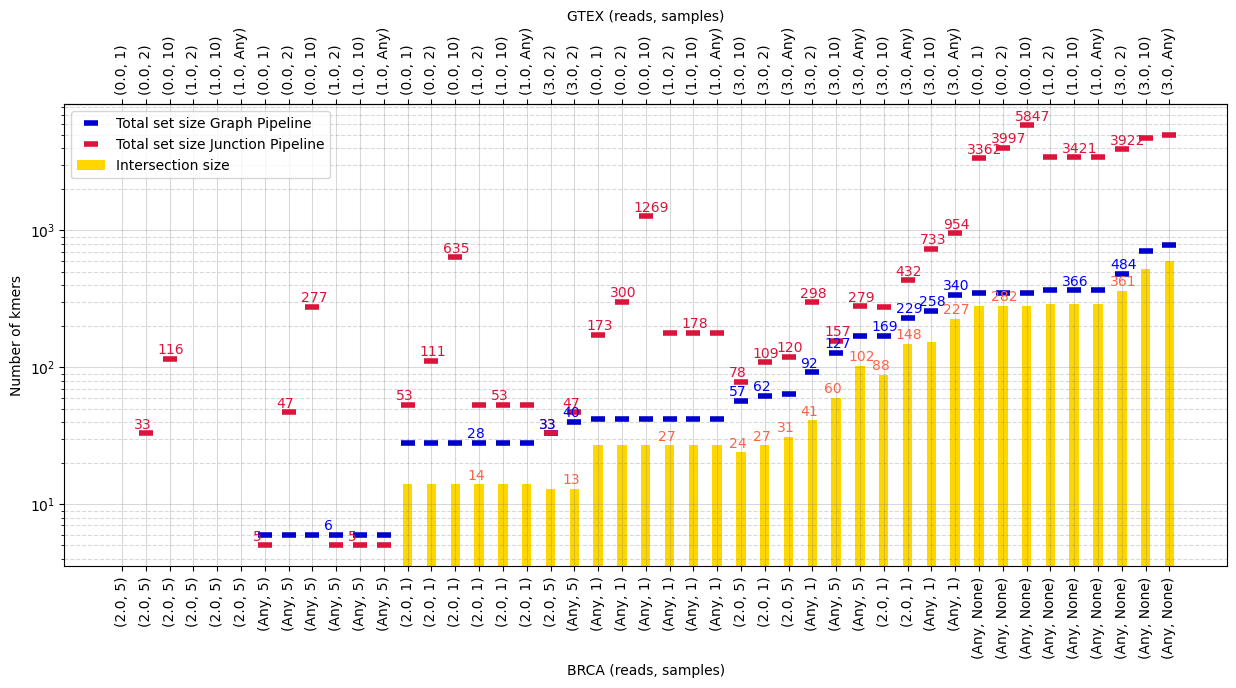

In [72]:
# Plot

xaxis_label = 'GTEX (reads, samples)'
yaxis_label = f'{run_type.upper()} (reads, samples)'


colorgrid = 'grey'
alpha_grid = 0.3
marker_size = 10
mew = 4
color1 = 'gold'
color2 = 'crimson'
color4 = 'mediumblue'
colorgrid = 'grey'

fig, ax1 = plt.subplots(figsize=(15, 6))
ax2 =  ax1.secondary_xaxis('top')   
#plt.figure(figsize=(15, 6), frameon=False, dpi=100)
plt.grid(b=True, axis = 'both', which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
plt.grid(b=False, axis = 'both', which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)
width = 0.4
plt.bar(df['index'], df['size_intersection'], width=width, 
        color=color1, label='Intersection size')
plt.plot(df['index'], df['size_eth'], alpha=1, color=color4,
         linestyle = 'None', markerfacecolor='None', marker="_", markersize=marker_size, markeredgewidth=mew,
         label = 'Total set size Graph Pipeline')
plt.plot(df['index'], df['size_ohsu'], alpha=1, color=color2,
         linestyle = 'None', markerfacecolor='None', marker="_", markersize=marker_size, markeredgewidth=mew,
         label = 'Total set size Junction Pipeline')

plot_text(df['size_ohsu'], df['size_ohsu'], 'top', color='crimson')
plot_text(df['size_eth'], df['size_eth'], 'top', color='blue')
plot_text(df['size_intersection'], df['size_intersection'], color='tomato')

plt.yscale('log')
max_scale = np.max([df['size_ohsu'].values, df['size_eth'].values])



ax1.set_xticks(np.arange(len(df['index'])), 
           labels = front_ticks,
           rotation = 90, 
           ha = 'center')

ax2.set_xticks(np.arange(len(df['index'])), 
           labels = back_ticks,
           rotation = 90, 
           ha = 'center')

plt.legend()
plt.ylabel('Number of kmers')
ax2.set_xlabel(xaxis_label)
ax1.set_xlabel(yaxis_label)



save = True
name = 'Barplot_ovelap'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
plt.show()

# Plot Intersections

In [73]:
df.columns

Index(['sample', 'filter_foreground', 'filter_background', 'size_ohsu',
       'size_eth', 'size_intersection', 'size_ohsu\eth', 'size_eth\ohsu',
       'filter_background_reads', 'filter_background_samples',
       'filter_foreground_reads', 'filter_foreground_samples',
       'filter_foreground_target', 'index'],
      dtype='object')

In [74]:
# Sort Valus for plot
df = df.sort_values(['size_eth', 
                     'filter_foreground_target',
                     'filter_foreground_reads', 
                     'filter_foreground_samples', 
                     'filter_background_reads', 
                     'filter_background_samples'
                    ], 
                   ascending=[False, False, False, False, False, False])
df['index'] = np.arange(len(df))

order_foreground = df['filter_foreground'].unique()
order_background = df['filter_background'].unique()

In [75]:
# Collect plot data
titles = ['Intersection size', 
'Total set size Graph Pipeline', 
'Total set size Junction Pipeline']
xaxis_label = 'GTEX (reads, samples)'
yaxis_label = f'{run_type.upper()} (reads, samples)'

df_plot = []
for f in ['size_intersection', 'size_eth', 'size_ohsu']: #, 'size_ohsu\eth', 'size_eth\ohsu']:
    # Extract the intersection
    df_inter = df.pivot(index = 'filter_foreground', columns = 'filter_background', values = f )
    # Enforce order
    df_inter = df_inter.loc[order_foreground, order_background]
    df_plot.append(df_inter)
    


In [76]:
npcol

3

/scratch/slurm-job.1666476/ipykernel_1738428/143980644.py:22: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(panelplot)


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot_STAR/plots/TCGA-AO-A0JM-01A-21R-A056-07_Matrix_ovelap.pdf


/scratch/slurm-job.1666476/ipykernel_1738428/143980644.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


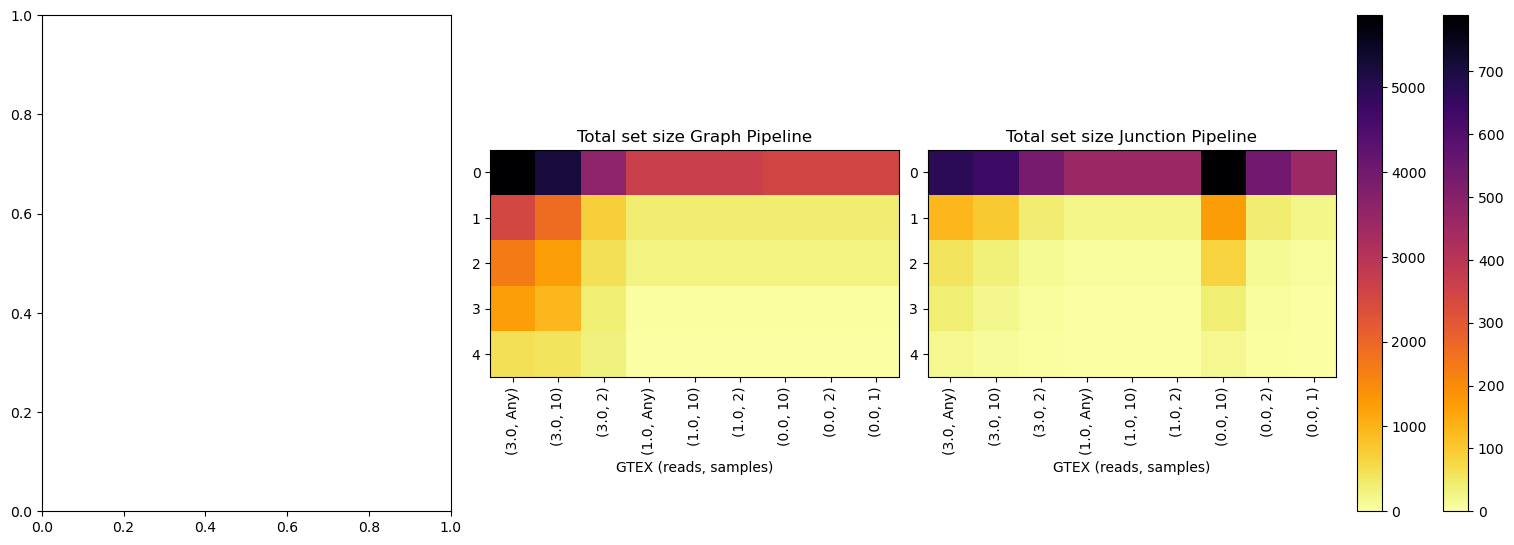

In [81]:
# Plot
nprow = 1
npcol = 3
fig = plt.figure(figsize=(15, 6), layout='constrained')
axes = [fig.add_subplot(nprow, npcol, i) for i in range(1,npcol+1)]

#vmin = max(1, np.min([df['size_eth'], df['size_ohsu']]))
#vmax = np.max([df['size_eth'], df['size_ohsu']]) #1e5
for pane_idx in [1,2] :#np.arange(npcol):
    panelplot=axes[pane_idx].imshow(df_plot[pane_idx], origin='upper', 
                                    cmap='inferno_r') #norm=LogNorm(vmin=vmin, vmax=vmax))
    # x-axis 
    axes[pane_idx].set_title(titles[pane_idx])
    axes[pane_idx].set_xlabel(xaxis_label)
    axes[pane_idx].set_xticks(range(df_plot[pane_idx].shape[1]))
    axes[pane_idx].set_xticklabels(prepare_backticks(df_plot[pane_idx].columns), rotation = 90 )
    if pane_idx == 0 :
        # y-axis
        axes[pane_idx].set_ylabel(yaxis_label)
        axes[pane_idx].set_yticks(range(df_plot[pane_idx].shape[0]))
        axes[pane_idx].set_yticklabels(prepare_frontticks(df_plot[pane_idx].index), rotation = 45 )
    plt.colorbar(panelplot)

save = True
name = 'Matrix_ovelap'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102/filtering_samples/filters_19May_order_5ge_wAnnot_STAR/plots/TCGA-AO-A0JM-01A-21R-A056-07_Matrix_ovelap.pdf


/scratch/slurm-job.1666476/ipykernel_1738428/4023554690.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


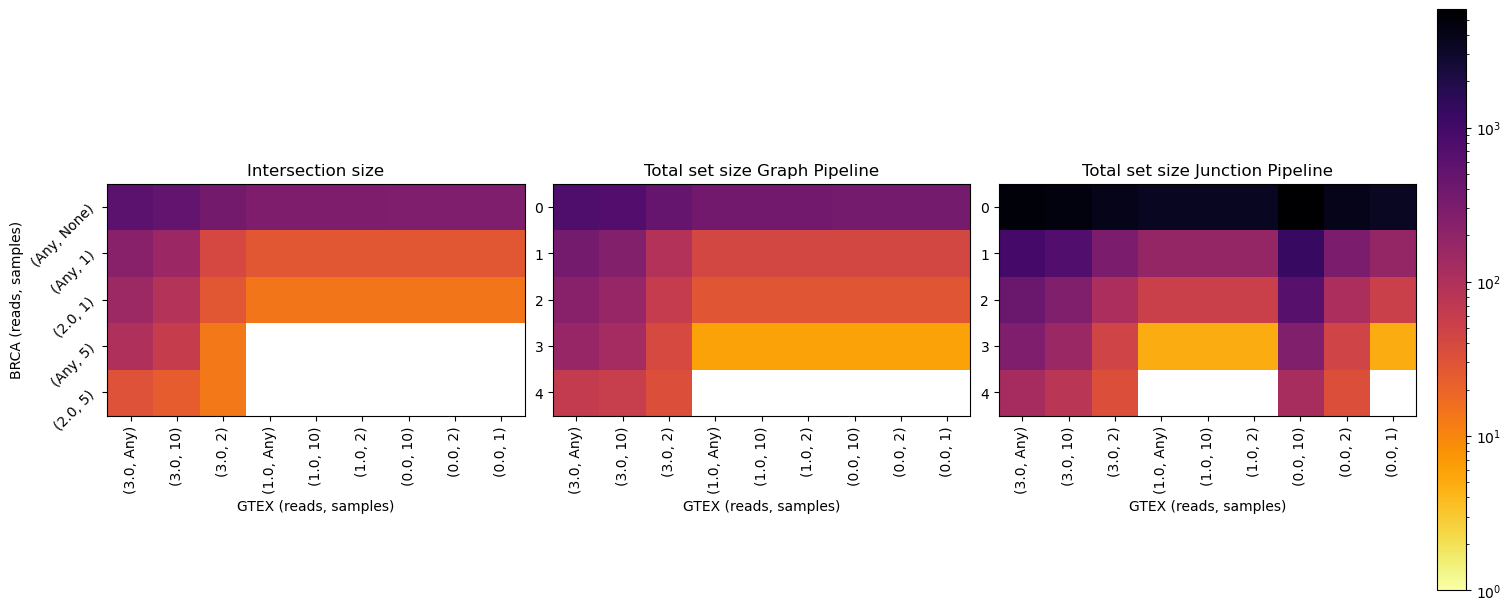

In [78]:
# Plot
nprow = 1
npcol = 3
fig = plt.figure(figsize=(15, 6), layout='constrained')
axes = [fig.add_subplot(nprow, npcol, i) for i in range(1,npcol+1)]

vmin = max(1, np.min([df['size_eth'], df['size_ohsu']]))
vmax = np.max([df['size_eth'], df['size_ohsu']]) #1e5
for pane_idx in np.arange(npcol):
    panelplot=axes[pane_idx].imshow(df_plot[pane_idx], origin='upper', 
                                    cmap='inferno_r', norm=LogNorm(vmin=vmin, vmax=vmax))
    # x-axis 
    axes[pane_idx].set_title(titles[pane_idx])
    axes[pane_idx].set_xlabel(xaxis_label)
    axes[pane_idx].set_xticks(range(df_plot[pane_idx].shape[1]))
    axes[pane_idx].set_xticklabels(prepare_backticks(df_plot[pane_idx].columns), rotation = 90 )
    if pane_idx == 0 :
        # y-axis
        axes[pane_idx].set_ylabel(yaxis_label)
        axes[pane_idx].set_yticks(range(df_plot[pane_idx].shape[0]))
        axes[pane_idx].set_yticklabels(prepare_frontticks(df_plot[pane_idx].index), rotation = 45 )
plt.colorbar(panelplot)

save = True
name = 'Matrix_ovelap'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()


In [79]:
df_plot[1]

filter_background,FiltNormalsGtexCohortCohortlim3.0AcrossAny,FiltNormalsGtexCohortCohortlim3.0Across10,FiltNormalsGtexCohortCohortlim3.0Across2,FiltNormalsGtexCohortCohortlim1.0AcrossAny,FiltNormalsGtexCohortCohortlim1.0Across10,FiltNormalsGtexCohortCohortlim1.0Across2,FiltNormalsGtexCohortCohortlim0.0Across10,FiltNormalsGtexCohortCohortlim0.0Across2,FiltNormalsGtexCohortCohortlim0.0Across1
filter_foreground,,,,,,,,,
SampleLim0.0CohortLimAnyAcrossNone,789,707,484,366,366,366,348,348,348
SampleLim0.0CohortLimAnyAcross1,340,258,92,42,42,42,42,42,42
SampleLim0.0CohortLim2.0Across1,229,169,62,28,28,28,28,28,28
SampleLim0.0CohortLimAnyAcross5,169,127,40,6,6,6,6,6,6
SampleLim0.0CohortLim2.0Across5,64,57,33,0,0,0,0,0,0


In [80]:
df_plot[2]

filter_background,FiltNormalsGtexCohortCohortlim3.0AcrossAny,FiltNormalsGtexCohortCohortlim3.0Across10,FiltNormalsGtexCohortCohortlim3.0Across2,FiltNormalsGtexCohortCohortlim1.0AcrossAny,FiltNormalsGtexCohortCohortlim1.0Across10,FiltNormalsGtexCohortCohortlim1.0Across2,FiltNormalsGtexCohortCohortlim0.0Across10,FiltNormalsGtexCohortCohortlim0.0Across2,FiltNormalsGtexCohortCohortlim0.0Across1
filter_foreground,,,,,,,,,
SampleLim0.0CohortLimAnyAcrossNone,4968,4740,3922,3421,3421,3421,5847,3997,3362
SampleLim0.0CohortLimAnyAcross1,954,733,298,178,178,178,1269,300,173
SampleLim0.0CohortLim2.0Across1,432,274,109,53,53,53,635,111,53
SampleLim0.0CohortLimAnyAcross5,279,157,47,5,5,5,277,47,5
SampleLim0.0CohortLim2.0Across5,120,78,33,0,0,0,116,33,0
